# SVM soft-margin

### Prediction

$$
\begin{align*}
h(\mathbf{x}) &= \mathbf{w^\intercal x} + b \\
y &= \text{sgn}(h(\mathbf{x}))
\end{align*}
$$

### Hinge loss
$$
\begin{align*}
L(y, h(\mathbf{x})) &= \begin{cases}
        0 & \text{if } y h(\mathbf{x}) \geq 1\\
        1 - y h(\mathbf{x}) & \text{else }
    \end{cases} \\
&= \max{(0, 1 - y h(\mathbf{x}))} \\
\end{align*}
$$

### Hinge loss partial derivatives
$$
\begin{align*}
\frac{\partial L}{\partial \mathbf{w}} &= \begin{cases}
        0 & \text{if } y h(\mathbf{x}) \geq 1\\
        -y \mathbf{x} & \text{else }
    \end{cases} \\
\frac{\partial L}{\partial b} &= \begin{cases}
        0 & \text{if } y h(\mathbf{x}) \geq 1\\
        -y & \text{else }
    \end{cases} \\
\end{align*}
$$

### Error function
$$
\begin{align*}
E(\mathbf{w}|\mathcal{D}) &= \frac{\lambda}{2} ||\mathbf{w}||^2 + \frac{1}{N} \sum_{i=1}^{N} L(y_i, h(\mathbf{x_i})) \\
&= \frac{\lambda}{2} ||\mathbf{w}||^2 + \frac{1}{N} \sum_{i=1}^{N} \max{(0, 1 - y_i h(\mathbf{x_i}))} \\
&= \frac{\lambda}{2} \mathbf{w}^\intercal \mathbf{w} + \frac{1}{N} \sum_{i=1}^{N} \max{(0, 1 - y_i h(\mathbf{x_i}))}
\end{align*}
$$

### Error function gradients
$$
\begin{align*}
\frac{\partial E}{\partial \mathbf{w}} &= 
        \begin{cases}
        \lambda \mathbf{w} & \text{if } y h(\mathbf{x}) \geq 1\\
        \lambda \mathbf{w} -y \mathbf{x} & \text{else }
    \end{cases} \\
\frac{\partial E}{\partial b} &= 
        \begin{cases}
        0 & \text{if } y h(\mathbf{x}) \geq 1\\
        -y  & \text{else }
    \end{cases} \\

\end{align*}
$$

### Gradient descent updates
$$
\begin{align*}
\mathbf{w}_{t + 1} &= \mathbf{w}_{t} - \alpha \frac{\partial E}{\partial \mathbf{w}} \\
b_{t + 1} &= b_t - \alpha \frac{\partial E}{\partial b}
\end{align*}
$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def plot_2d_clf_problem(X, y, h=None):
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision surfaces.
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h!=None : 
        # Create a mesh to plot in
        r = 0.03  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX=np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if Z_test.shape == ():
                # h returns a scalar when applied to a matrix; map explicitly
                Z = np.array(list(map(h,XX)))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = np.array(list(map(h,XX)))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

    # Plot the dataset
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.tab20b, marker='o', s=50);

In [3]:
class SVM:

    def __init__(self, lambda_param=1e-2, lr=1e-2, max_iter=1000):
        self.lambda_param = lambda_param
        self.lr = lr
        self.max_iter = max_iter
        self.weights = None
        self.bias = 0

    def hinge_loss(self, X, y):
        return np.maximum(0, 1 - y * np.dot(X, self.weights))

    def error(self, X, y):
        return 0.5 * self.lambda_param * np.sum(self.weights ** 2) + np.mean(self.hinge_loss(X, y))
    
    def accuracy(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y)
    
    def predict(self, X):
        prediction = np.dot(X, self.weights) + self.bias
        return np.sign(prediction)

    def fit(self, X, y):

        y = np.where(y <= 0, -1, 1)
        if len(y.shape) != 1:
            y = y.reshape(-1)

        n_features = X.shape[1]
        self.weights = np.zeros(n_features)

        for _ in range(self.max_iter):

            for idx, x in enumerate(X):

                y_pred = np.dot(x, self.weights) + self.bias

                condition = y[idx] * y_pred >= 1

                if condition:
                    dw = self.lambda_param * self.weights
                    self.weights -= self.lr * dw
                else:
                    dw = self.lambda_param * self.weights - y[idx] * x
                    db = -y[idx]
                    self.weights -= self.lr * dw
                    self.bias -= self.lr * db

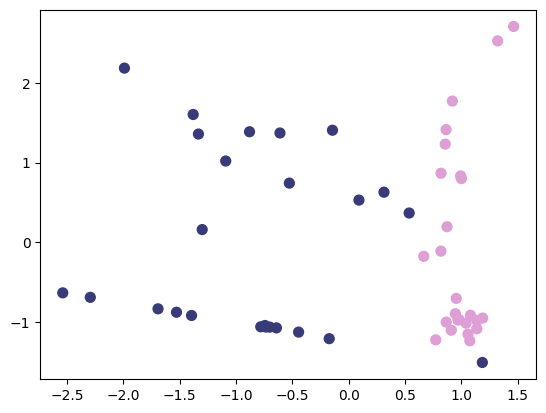

In [6]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=50, n_informative=2, n_features=2, n_redundant=0, n_clusters_per_class=2)
plot_2d_clf_problem(X, y)

Accuracy: 0.96


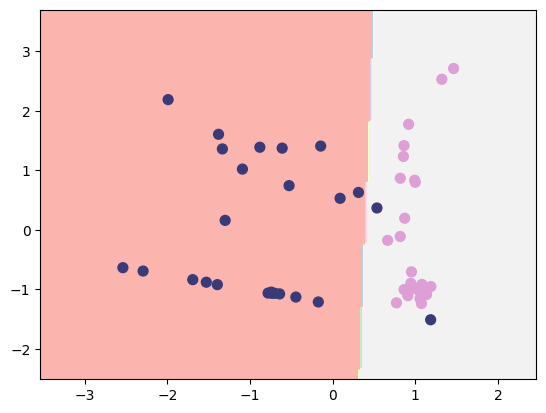

In [7]:
model = SVM(lambda_param=0, lr = 1e-3, max_iter=1000)
model.fit(X, y)
y_pred = model.predict(X)
y = np.where(y <= 0, -1, 1)
print(f'Accuracy: {model.accuracy(X, y)}')
plot_2d_clf_problem(X, y, model.predict)